In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [2]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L190500']]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [5]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [7]:
corr=data[numerical_cols].corr()
corr=corr.L190500_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
134,L393800,1.000000
278,L190500_y,1.000000
149,L500900,0.965163
71,L122000,0.918004
95,L190500_x,0.833069


In [8]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [9]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,L190500_y,1.000000,159190
4,L190500_x,0.833069,159204
5,L190400,0.832291,159241
6,L190300,0.736047,159204
7,SEX,0.718190,159381
11,S000100,0.524703,159302
13,L100500,0.513891,158954
15,L100700,0.492174,152474
25,S000300,0.352182,159075
26,L103300,0.351339,135222


In [10]:
print(list(mergedColCorrCount.head(20).Col))

['L190500_y', 'L190500_x', 'L190400', 'L190300', 'SEX', 'S000100', 'L100500', 'L100700', 'S000300', 'L103300', 'S000501', 'L104500', 'L190800', 'S000502', 'L103100', 'L101300', 'L190700', 'L104300', 'L103000', 'L101700']


Anova test - For categorical values [Questionnaire answers]
=======

In [11]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [12]:
colslist=mydataset.columns
DiabeticColVals=data.L190500_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [13]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [14]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,8523.340617,0.000000e+00,158877
28,FIELD_38,2178.938091,0.000000e+00,158885
29,FIELD_40,537.846956,0.000000e+00,158891
19,FIELD_29,403.915553,1.000523e-89,159172
8,FIELD_18,335.536617,7.146283e-75,159172
15,FIELD_25,296.171450,2.582640e-66,159173
30,FIELD_41,235.124436,0.000000e+00,158861
21,FIELD_31,59.868335,1.020116e-14,159173
31,FIELD_42,58.715560,3.070345e-96,158840
9,FIELD_19,42.221720,8.172912e-11,159170


In [15]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 'FIELD_41', 'FIELD_31', 'FIELD_42', 'FIELD_19']


========================= LASSO method
================

In [17]:
selectedcols=['L190500_y', 'L190500_x', 'L190400', 'L190300', 'SEX', 'S000100', 'L100500', 'L100700', 'S000300', 
              'L103300', 'S000501', 'L104500', 'L190800', 'S000502', 'L103100', 'L101300', 'L190700', 'L104300', 
              'L103000', 'L101700','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 
              'FIELD_41', 'FIELD_31', 'FIELD_42', 'FIELD_19'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(70453, 30)


In [18]:
x=data2[['L190500_x', 'L190400', 'L190300', 'SEX', 'S000100', 'L100500', 'L100700', 'S000300', 
              'L103300', 'S000501', 'L104500', 'L190800', 'S000502', 'L103100', 'L101300', 'L190700', 'L104300', 
              'L103000', 'L101700','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18', 'FIELD_25', 
              'FIELD_41', 'FIELD_31', 'FIELD_42', 'FIELD_19'
        ]]
y=data2.L190500_y

In [19]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 7.02057910e-01  0.00000000e+00  0.00000000e+00 -1.91485847e-01
  3.48637283e-02  0.00000000e+00  0.00000000e+00  3.00462887e-02
 -0.00000000e+00  9.32196075e-03 -5.61795810e-03  1.92869017e-01
  0.00000000e+00 -1.43872498e-02  6.16878606e-04  0.00000000e+00
 -5.34421647e-03 -3.93998420e-05  2.83984313e-03  5.07159799e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00]
0.9744542257396844


,Name,coeff
0,L190500_x,0.702058
11,L190800,0.192869
3,SEX,0.191486
19,FIELD_33,0.050716
4,S000100,0.034864
7,S000300,0.030046
13,L103100,0.014387
9,S000501,0.009322
10,L104500,0.005618
16,L104300,0.005344


In [20]:
print(list(lassod.Name[:20]))

['L190500_x', 'L190800', 'SEX', 'FIELD_33', 'S000100', 'S000300', 'L103100', 'S000501', 'L104500', 'L104300', 'L101700', 'L101300', 'L103000']


=============================== SelectKBest method
========================

In [21]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L190500_x', 'L190400', 'L190300', 'SEX', 'S000100', 'L100500', 'L100700', 'S000300', 'L103300', 'S000501', 'L104500', 'L190800', 'S000502', 'L103100', 'L101300', 'L190700']


========================================= LinearSVC
===============

In [22]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [23]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [24]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.10701938 0.08135768 0.0427797  0.52102572 0.01223547 0.01190451
 0.01243681 0.0121506  0.01118468 0.01168418 0.01530957 0.01402657
 0.01163384 0.01230707 0.01095132 0.01232371 0.01324528 0.01159656
 0.01048684 0.00709683 0.01098276 0.00955717 0.00522675 0.00188136
 0.00144322 0.0098521  0.00517066 0.0113678  0.00176188]


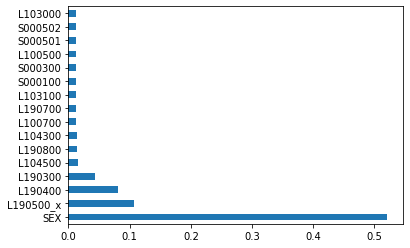

Index(['SEX', 'L190500_x', 'L190400', 'L190300', 'L104500', 'L190800',
       'L104300', 'L100700', 'L190700', 'L103100', 'S000100', 'S000300',
       'L100500', 'S000501', 'S000502', 'L103000'],
      dtype='object')


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [26]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              L190500_y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     6605.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:50:20   Log-Likelihood:            -1.5184e+05
No. Observations:               70453   AIC:                         3.037e+05
Df Residuals:                   70423   BIC:                         3.040e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L190500_x      0.1310      0.050      2.598      0.009       0.032       0.230
L190400        1.3636      0.132     10.315      0.000       1.104       1.623
L190300        0.6679      0.312      2.143      0.032       0.057       1.279
SEX           -1.6403      0.036    -45.103      0.000      -1.712      -1.569
S000100       -0.0016      0.001     -1.122      0.262      -0.004       0.001
L100500       -0.3793      0.057     -6.664      0.000      -0.491      -0.268
L100700       -0.0531      0.008     -6.608      0.000      -0.069      -0.037
S000300        0.0294      0.003      9.447      0.000       0.023       0.036
L103300       -0.0892      0.013     -6.916      0.000      -0.114      -0.064
S000501        0.0049      0.001      4.650      0.000       0.003       0.007
L104500       -0.0049      0.000    -24.141      0.000      -0.005      -0.004
L190800       -0.3319      0.065     -5.130      0.000      -0.459      -0.205
S000502        0.0008      0.001      0.565      0.572      -0.002       0.003
L103100       -0.0106      0.001    -11.009      0.000      -0.013      -0.009
L101300        0.0008      0.000      1.646      0.100      -0.000       0.002
L190700        0.0667      0.048      1.388      0.165      -0.027       0.161
L104300       -0.0051      0.000    -21.413      0.000      -0.006      -0.005
L103000     5.706e-05      0.000      0.481      0.631      -0.000       0.000
L101700        0.0012      0.000      4.347      0.000       0.001       0.002
FIELD_33       0.1146      0.012      9.605      0.000       0.091       0.138
FIELD_38       0.0137      0.007      1.909      0.056      -0.000       0.028
FIELD_40       0.0055      0.007      0.811      0.417      -0.008       0.019
FIELD_29       0.0015      0.023      0.063      0.950      -0.044       0.047
FIELD_18      -0.1204      0.069     -1.735      0.083      -0.256       0.016
FIELD_25       0.0694      0.084      0.828      0.408      -0.095       0.234
FIELD_41       0.0104      0.007      1.595      0.111      -0.002       0.023
FIELD_31       0.0117      0.024      0.490      0.624      -0.035       0.059
FIELD_42      -0.0005      0.004     -0.144      0.885      -0.008       0.007
FIELD_19      -0.0005      0.062     -0.009      0.993      -0.121       0.120
const         25.9791      1.837     14.142      0.000      22.379      29.580
==============================================================================
Omnibus:                     2893.121   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9464.406
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                       4.794   Cond. No.                     8.15e+04
==============================================================================

W

In [27]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [28]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [29]:
print(temp.columns.shape)
temp.columns

(30,)


Index(['L190500_x', 'L190400', 'L190300', 'SEX', 'S000100', 'L100500',
       'L100700', 'S000300', 'L103300', 'S000501', 'L104500', 'L190800',
       'S000502', 'L103100', 'L101300', 'L190700', 'L104300', 'L103000',
       'L101700', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_18',
       'FIELD_25', 'FIELD_41', 'FIELD_31', 'FIELD_42', 'FIELD_19', 'const'],
      dtype='object')

================== Check Variance inflation factor and multi collinearity
==================== 

In [ ]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

In [ ]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

In [ ]:
print(newcols,len(newcols))